In [1]:
#Yamsi Tchuisseu Joy Sylver  ICTU1020983
#Simple Reccomender System
#MovieLens Dataset used from https://grouplens.org/datasets/movielens/

import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the ratings dataset

df = pd.read_csv('ml-latest-small/ratings.csv', names=['user_id','movie_id','rating','timestamp'],)

In [3]:
#checking the head of our data

df.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#we also load the titles dataset to be able to have the movies titles

movie_titles = pd.read_csv('ml-latest-small/movies.csv',names=['movie_id','title','genre'])

movie_titles.head()

,movie_id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#then we merge our datasets since their movie_id are same

df = pd.merge(df, movie_titles, on='movie_id')

df.head()

,user_id,movie_id,rating,timestamp,title,genre
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
#let's get a brief description of the dataset we working with

df.describe()

,user_id,movie_id,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#We can tell that the max rating is 4. We also see that the dataset has 100837 records.

In [7]:
#Let’s now create a dataframe with the average rating for each movie and the number of ratings. 
#We are going to use these ratings to calculate the correlation between the movies later

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [8]:
#now we also want to see the number of rating for each film
#so that we can see the relationship between the average rating of a movie and the number of ratings the movie got

ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


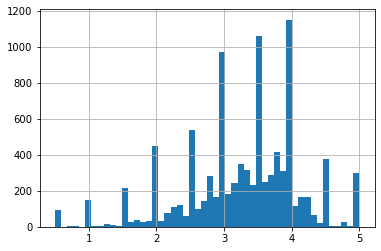

In [9]:
#Let’s now plot a Histogram using pandas plotting functionality to visualize the distribution of the ratings

import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

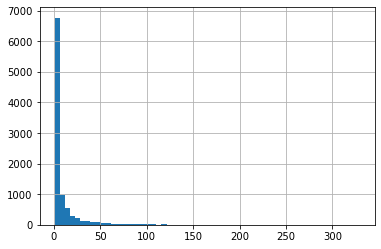

In [10]:
#We can see that most of the movies are rated between 3 and 4. 
#Next let’s visualize the number_of_ratings column in as similar manner.

ratings['number_of_ratings'].hist(bins=60)

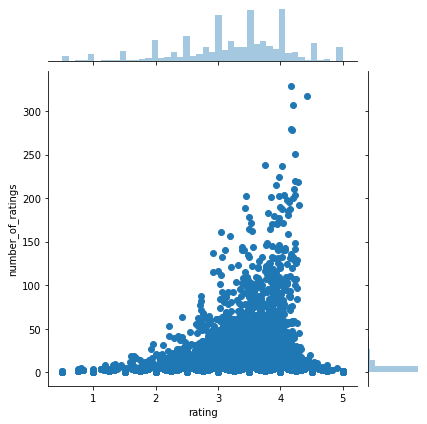

In [11]:
#From the above histogram it is clear that most movies have few  or no ratings. 
#Movies with most ratings are those that are most famous.

#Let’s now check the relationship between the rating of a movie and the number of ratings

import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [12]:
#The graph indicates that the more the ratings a movie gets the higher the average rating it gets up to a certain point.

'''Let’s now move on swiftly and create a simple item based recommender system. 
In order to do this we need to convert our dataset into a matrix with the movie titles as the columns, 
the user_id as the index and the ratings as the values.'''

#We use pandas pivot_table utility to create the movie matrix.

movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating',fill_value=0)
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4.0,0
2,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
5,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0


In [13]:
#Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system.

ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [14]:
'''Let’s assume that a user has watched Forrest Gump (1994) and Shawshank Redemption, The (1994). 
We would like like to recommend movies to this user based on this watching history. 
The goal is to look for movies that are similar to Forrest Gump (1994) and Shawshank Redemption, The (1994) which we shall recommend to this user. 
We can achieve this by computing the correlation between these two movies’ ratings and the ratings of the rest of the movies in the dataset. 
The first step is to create a dataframe with the ratings of these movies from our movie_matrix.'''

redemption_user_rating = movie_matrix['Shawshank Redemption, The (1994)']
forrest_user_rating = movie_matrix['Forrest Gump (1994)']

In [15]:
#Let's take a look at our dataframes below.
redemption_user_rating.head()



user_id
1    0.0
2    3.0
3    0.0
4    0.0
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [16]:
forrest_user_rating.head()

user_id
1    4.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: Forrest Gump (1994), dtype: float64

In [17]:
#let's now compute the correlation for our dataframes




In [18]:
similar_to_redemption=movie_matrix.corrwith(redemption_user_rating) 

similar_to_redemption.sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    1.000000
Pulp Fiction (1994)                 0.413893
Forrest Gump (1994)                 0.411180
Usual Suspects, The (1995)          0.393282
Schindler's List (1993)             0.373296
dtype: float64

In [19]:
'''We can see that the correlation between Shawshank Redemption, The (1994) and Pulp Fiction (1994) is 0.413893. 
This indicates a similarity between these two movies.
We go on and compute the correlation for Forrest Gump'''

similar_to_forrest=movie_matrix.corrwith(forrest_user_rating) 

similar_to_forrest.sort_values(ascending=False).head()

title
Forrest Gump (1994)                 1.000000
Jurassic Park (1993)                0.453632
Mrs. Doubtfire (1993)               0.440460
Shawshank Redemption, The (1994)    0.411180
Apollo 13 (1995)                    0.390374
dtype: float64

In [20]:
'''We can see that the correlation between Forrest Gump (1994) and Jurassic Park (1993)  is  0.453632. 
This indicates a similarity between these two movies.'''

'''As noticed earlier our matrix had very many missing values since not all the movies were rated by all the users.
We therefore drop those null values and transform correlation results into dataframes to make the results look more 
appealing.'''

corr_forrest = pd.DataFrame(similar_to_forrest, columns=['Correlation'])
corr_forrest.dropna(inplace=True)
corr_forrest.sort_values('Correlation',ascending=False).head()


,Correlation
title,
Forrest Gump (1994),1.000000
Jurassic Park (1993),0.453632
Mrs. Doubtfire (1993),0.440460
"Shawshank Redemption, The (1994)",0.411180
Apollo 13 (1995),0.390374


In [21]:
corr_redemption = pd.DataFrame(similar_to_redemption, columns=['Correlation'])
corr_redemption.dropna(inplace=True)
corr_redemption.sort_values('Correlation',ascending=False).head()

,Correlation
title,
"Shawshank Redemption, The (1994)",1.000000
Pulp Fiction (1994),0.413893
Forrest Gump (1994),0.411180
"Usual Suspects, The (1995)",0.393282
Schindler's List (1993),0.373296


In [22]:
'''These two dataframes above show us the movies that are most similar to Forrest Gump (1994) and 
Shawshank Redemption, The (1994) movies respectively. However we have a challenge in that some of the movies have 
very few ratings and may end up being recommended simply because one or two people gave them a 5 star rating.
We can fix this by setting a threshold for the number of ratings. From the histogram earlier we saw a sharp 
decline in number of ratings from 250. We shall therefore set this as the threshold.'''

'''In order to do this we need to join the two dataframes with the number_of_ratings column in the ratings dataframe.'''

corr_forrest = corr_forrest.join(ratings['number_of_ratings'])
corr_redemption = corr_redemption.join(ratings['number_of_ratings'])


In [23]:
corr_forrest.head()

,Correlation,number_of_ratings
title,,
'71 (2014),0.014126,1
'Hellboy': The Seeds of Creation (2004),0.042224,1
'Round Midnight (1986),0.000109,2
'Salem's Lot (2004),-0.042070,1
'Til There Was You (1997),-0.019184,2


In [24]:
corr_redemption.head()

,Correlation,number_of_ratings
title,,
'71 (2014),0.012458,1
'Hellboy': The Seeds of Creation (2004),0.039217,1
'Round Midnight (1986),-0.001304,2
'Salem's Lot (2004),-0.041059,1
'Til There Was You (1997),-0.056374,2


In [25]:
'''We shall now obtain the movies that are most similar to Forrest Gump (1994) 
by limiting them to movies that have at least 100 reviews. We then sort them by the 
correlation column and view the first 10.'''

corr_forrest[corr_forrest['number_of_ratings'] > 250].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.411180,317
Pulp Fiction (1994),0.373776,307
"Silence of the Lambs, The (1991)",0.312303,279
"Matrix, The (1999)",0.260824,278
Star Wars: Episode IV - A New Hope (1977),0.159374,251


In [26]:
'''We notice that Forrest Gump (1994) has a perfect correlation with itself, which is not surprising. 
The next most similar movie to Forrest Gump (1994) is Shawshank Redemption, The (1994) with a correlation of 0.411180'''

'''Clearly by changing the threshold for the number of reviews we get different results from the previous 
way of doing it. Limiting the number of rating gives us better results and we can confidently recommend the 
above movies to someone who has watched Forrest Gump (1994).'''

'''Now let’s do the same for Shawshank Redemption, The (1994) movie and see the movies that are most correlated to it.'''

corr_redemption[corr_redemption['number_of_ratings'] > 250].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_ratings
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Pulp Fiction (1994),0.413893,307
Forrest Gump (1994),0.411180,329
"Silence of the Lambs, The (1991)",0.333570,279
"Matrix, The (1999)",0.228870,278
Star Wars: Episode IV - A New Hope (1977),0.132630,251


In [27]:
'''Here we get thesame result as the previous method but we can be more confident with this. 
The most similar movie to Shawshank Redemption, The (1994) is Pulp Fiction (1994)	 
with a correlation coefficient of 0.413893 with 307 ratings. So if somebody liked Shawshank Redemption, The (1994) 
we can recommend the above movies to them.'''

'''THANK YOU'''

'THANK YOU'